In [1]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2023-08-08 10:46:56--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db, 2406:da00:ff00::22c5:2ef4, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  80.5MB/s    in 1.3s    

2023-08-08 10:47:00 (80.5 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [2]:
2+2

4

here we get fruits data in zip format from https website. Now we will unzip it

In [3]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


so here instead of downloading large dataset we directly called it from website to avoid memory problem

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
img_height,img_width = 32,32
batch_size = 20

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory("fruits/train",
                                                       image_size = (img_height,img_width),
                                                       batch_size = batch_size)
test_ds = tf.keras.utils.image_dataset_from_directory("fruits/test",
                                                       image_size = (img_height,img_width),
                                                       batch_size = batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory("fruits/validation",
                                                       image_size = (img_height,img_width),
                                                       batch_size = batch_size)

Found 460 files belonging to 3 classes.
Found 130 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


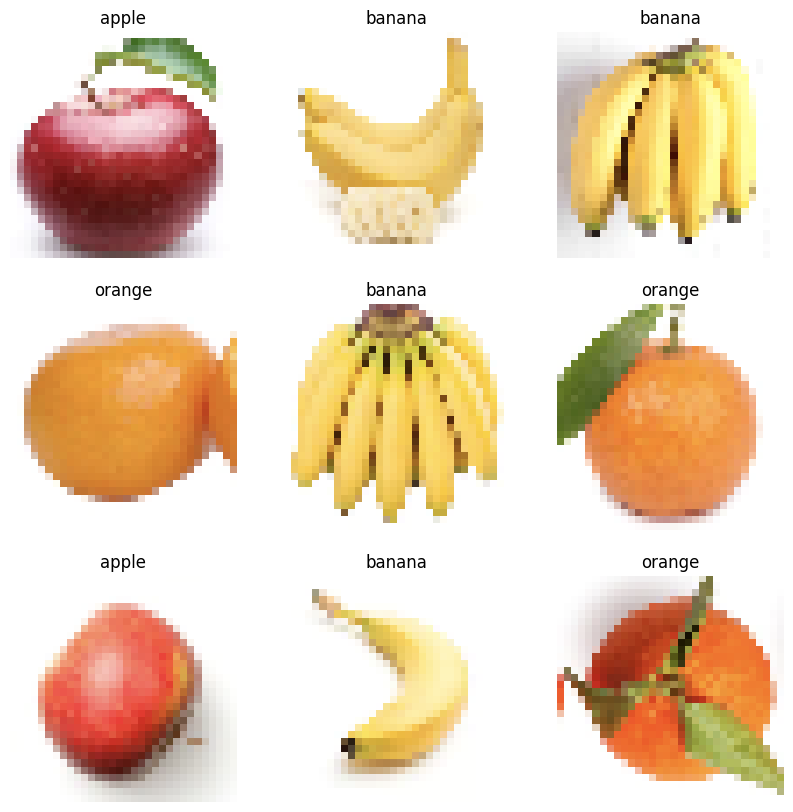

In [17]:
class_names = ["apple","banana","orange"]
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1): # This loop iterates over a dataset train_ds and extracts one batch of images and their corresponding labels.
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))   # first convert image into numpy array of pixel between 0 to 255 then usimg inshow converting array into image
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [18]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)

In [19]:
model.compile(
    optimizer = "adam",
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),  # for multiclass classification sparse cross entropy used
    metrics=["accuracy"]
)

In [21]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
23/23 [==============================] - 5s 144ms/step - loss: 0.9849 - accuracy: 0.5717 - val_loss: 0.7622 - val_accuracy: 0.6970
Epoch 2/10
23/23 [==============================] - 3s 96ms/step - loss: 0.6301 - accuracy: 0.7370 - val_loss: 0.5272 - val_accuracy: 0.7576
Epoch 3/10
23/23 [==============================] - 2s 80ms/step - loss: 0.4040 - accuracy: 0.8500 - val_loss: 0.4775 - val_accuracy: 0.7424
Epoch 4/10
23/23 [==============================] - 2s 79ms/step - loss: 0.3422 - accuracy: 0.8609 - val_loss: 0.1948 - val_accuracy: 0.9697
Epoch 5/10
23/23 [==============================] - 2s 83ms/step - loss: 0.2605 - accuracy: 0.9043 - val_loss: 0.2939 - val_accuracy: 0.8939
Epoch 6/10
23/23 [==============================] - 3s 125ms/step - loss: 0.2221 - accuracy: 0.9087 - val_loss: 0.2216 - val_accuracy: 0.8939
Epoch 7/10
23/23 [==============================] - 2s 76ms/step - loss: 0.1710 - accuracy: 0.9370 - val_loss: 0.1461 - val_accuracy: 0.9545
Epoch 8/10


In [22]:
model.evaluate(test_ds)

7/7 [==============================] - 1s 11ms/step - loss: 0.1157 - accuracy: 0.9692


[0.1156778410077095, 0.9692307710647583]

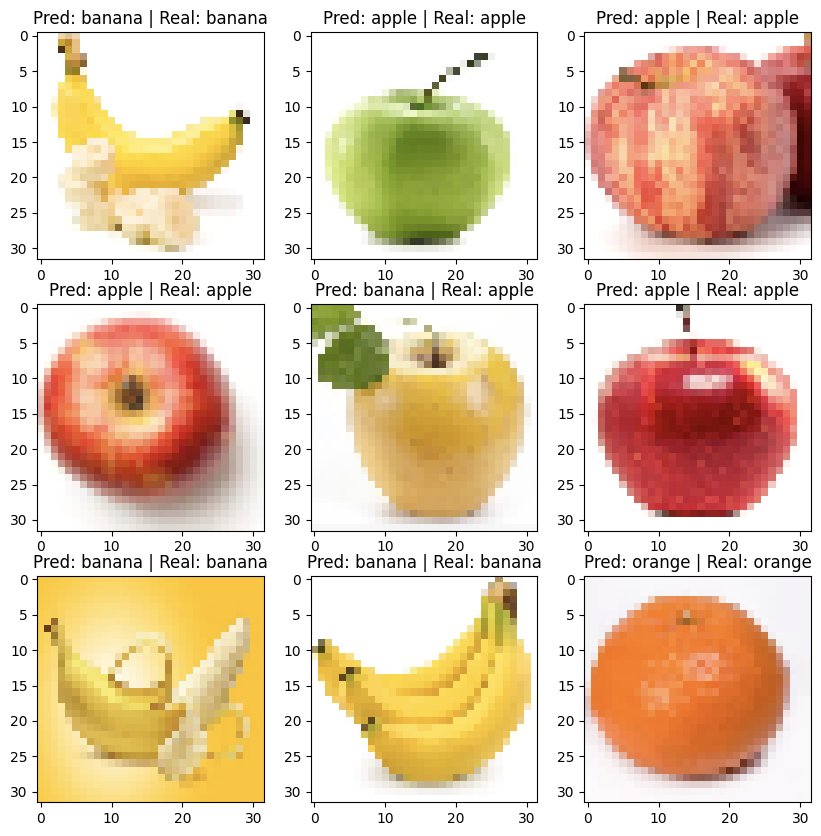

In [23]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [24]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)